<a href="https://colab.research.google.com/github/AlenaResiko/Project_curvature/blob/main/Estimate_curvature_2_copy_from_5_Nov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up

In [1]:
import curvature
import manifold
import numpy as np
import matplotlib.pyplot as plt
import math
import networkx as nx
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# distance matrices are loaded from drive

Mounted at /content/drive


# Any manifold function

In [3]:
def sample_any_manifold(manifold_type, n_points, R, file_name, r=0):
  # Euclidean, sphere, Poincare disk, hyperboloid, torus
  if manifold_type == "Euclidean":
    X_Euclidean = manifold.Euclidean.sample(n_points, 3, R=R)
    np.save(file_name, X_Euclidean)
    return X_Euclidean
  if manifold_type == "Euclidean2d":
    X_Euclidean_2d = manifold.Euclidean.sample(n_points, 2, R=R)
    np.save(file_name, X_Euclidean_2d)
    return X_Euclidean_2d
  if manifold_type == "Sphere":
    X_Sphere = manifold.Sphere.sample(n_points, 3, R=R)
    np.save(file_name, X_Sphere)
    return X_Sphere
  if manifold_type == "Sphere2d":
    X_Sphere_2d = manifold.Sphere.sample(N=n_points, n=2, R=R)
    np.save(file_name, X_Sphere_2d)
    return X_Sphere_2d
  if manifold_type == "PoincareDisk":
    X_PoincareDisk = manifold.PoincareDisk.sample(n_points, Rh = R)
    np.save(file_name, X_PoincareDisk)
    return X_PoincareDisk
  if manifold_type == "Hyperboloid":
    X_Hyperboloid = manifold.Hyperboloid.sample(n_points, within_halfB=False)
    np.save(file_name, X_Hyperboloid)
    return X_Hyperboloid
  if manifold_type == "Torus":
    X_Torus = manifold.Torus.sample(n_points, r=r, R=R)[0]
    np.save(file_name, X_Torus)
    return X_Torus


In [4]:
def display_any_manifold(manifold_type, X):
  %matplotlib inline
  fig = plt.figure()
  if manifold_type == "Euclidean":
    ax = plt.axes(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], s = 3)
  if manifold_type == "Euclidean2d":
    ax = plt.axes(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], s = 3)
  if manifold_type == "Sphere":
    ax = plt.axes(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], s = 3)
  if manifold_type == "Sphere2d":
    ax = plt.axes(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], s = 3)
  if manifold_type == "PoincareDisk":
    ax = plt.axes(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], s = 3)
  if manifold_type == "Hyperboloid":
    ax = plt.axes(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], s = 3)
  if manifold_type == "Torus":
    ax = plt.axes(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], s = 3)
  plt.show()

In [ ]:
# this genrates RGG where edges are not weighted
# def RGG_any_manifold(manifold_type, D, min_distance, X, n_points):
#   G = nx.Graph()
#   e = []
#   position_list = []
#   for i in range(X.shape[0]):
#     position_list.append((i, {"point_position": X[i]}))
#   G.add_nodes_from(position_list)
#   for i in range(n_points):
#     for j in range(i, n_points):
#       if D[i][j] <= epsilon and i<j:
#         e.append([i, j])
#   G.add_edges_from(e)
#   return G

In [5]:
def RGG_any_manifold(manifold_type, D, epsilon, X, n_points):
  G = nx.Graph() # note that G is an undirected graph
  e_weighted = []
  position_list = []
  for i in range(X.shape[0]):
    position_list.append((i, {"point_position": X[i]}))
  G.add_nodes_from(position_list)
  for i in range(n_points):
    for j in range(i, n_points):
      if D[i][j] <= epsilon and i<j:
        e_weighted.append((i, j, D[i][j])) #because G is not directed, only need to store i,j
  G.add_weighted_edges_from(e_weighted)
  return G

In [6]:
def calculate_D_any_manifold(manifold_type, X):
  if manifold_type == "Euclidean":
    D = manifold.Euclidean.distance_array(X)
  if manifold_type == "Euclidean2d":
    D = manifold.Euclidean.distance_array(X)
  if manifold_type == "Sphere":
    D = manifold.Sphere.Rdist_array(3, X, R=2)
  if manifold_type == "Sphere2d":
    D = manifold.Sphere.Rdist_array(2, X, R=2)
  if manifold_type == "PoincareDisk":
    D = manifold.PoincareDisk.Rdist_array(X)
  if manifold_type == "Hyperboloid":
    D = manifold.Hyperboloid.distance_array(X) # uses Euclidean distance
  if manifold_type == "Torus":
    D = manifold.Torus.distance_array(X) # uses Euclidean distance
  return D

In [ ]:
# def display_graph_any_manifold(manifold_type, G):
#   # nx.draw_networkx_edges(G, pos=nx.get_node_attributes(G, "point_position"))

#   pos = nx.get_node_attributes(G, "point_position")
#   node_xyz = G.nodes()
#   edge_xyz = G.edges()

#   # Create the 3D figure
#   fig = plt.figure()
#   ax = fig.add_subplot(111, projection="3d")

#   # Plot the nodes - alpha is scaled by "depth" automatically
#   ax.scatter(pos, s=100, ec="w")

#   # Plot the edges
#   for vizedge in edge_xyz:
#       ax.plot(*vizedge.T, color="tab:gray")

#   _format_axes(ax)
#   fig.tight_layout()
#   plt.show()

# Example

In [10]:
# hyperparameters
R = 2
r = 1
epsilon = 0.3
n_points = 10000

In [ ]:
# # Sample graph for Euclidean
# %matplotlib notebook
# X_E = sample_any_manifold(manifold_type="Euclidean", n_points=n_points, R=R, file_name="E.npy")
# display_any_manifold(manifold_type = "Euclidean", X = X_E)
# D_Euclidean = calculate_D_any_manifold(manifold_type="Euclidean", X=X_E)
# np.save("D_E.npy", D_Euclidean)
# G_E = RGG_any_manifold("Euclidean", D_Euclidean, epsilon, X=X_E, n_points=n_points)
# pickle.dump(G_E, open('G_E.pickle', 'wb'))

X loaded


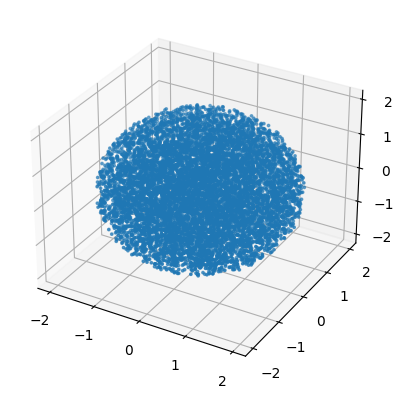

D loaded
G loaded
Number of edges:  154361
[[0.         1.57061836 2.78183075 ... 1.10704496 1.98879709 1.56804507]
 [1.57061836 0.         2.4782316  ... 2.40174262 2.70507006 1.87367931]
 [2.78183075 2.4782316  0.         ... 2.58304909 1.73543008 2.26084612]
 ...
 [1.10704496 2.40174262 2.58304909 ... 0.         1.42488206 1.9747972 ]
 [1.98879709 2.70507006 1.73543008 ... 1.42488206 0.         1.56225101]
 [1.56804507 1.87367931 2.26084612 ... 1.9747972  1.56225101 0.        ]]
[[-0.16277123 -1.48819432  0.30276799]
 [ 0.01287814 -0.69615612 -1.04209812]
 [-0.98700629  1.16817435  0.24869036]
 ...
 [-0.22908175 -1.05664566  1.3200768 ]
 [-1.37181225 -0.21024083  1.23032854]
 [-1.58783954 -0.98148945 -0.11099021]]
Graph with 10000 nodes and 154361 edges


In [11]:
X_E = np.load("/content/drive/MyDrive/Curvature Project/Calculated arrays/E.npy") #('E.npy')
print("X loaded")
display_any_manifold(manifold_type = "Euclidean", X = X_E)
D_Euclidean = np.load("/content/drive/MyDrive/Curvature Project/Calculated arrays/D_E.npy") #('D_E.npy')
print("D loaded")
G_E = pickle.load(open("/content/drive/MyDrive/Curvature Project/Calculated arrays/G_E.pickle", 'rb'))
print("G loaded")

print("Number of edges: ", len(G_E.edges()))
print(D_Euclidean)
print(X_E)
print(G_E)

In [9]:
nx.is_directed(G_E)

False

In [ ]:
# Sample graph for Sphere
# %matplotlib notebook
# X_S = sample_any_manifold(manifold_type="Sphere", n_points=n_points, R=R, file_name="S.npy")
# display_any_manifold(manifold_type = "Sphere", X = X_S)
# D_Sphere = calculate_D_any_manifold(manifold_type="Sphere", X=X_S)
# np.save("D_S.npy", D_Sphere)
# G_S = RGG_any_manifold("Sphere", D_Sphere, epsilon, X=X_S, n_points=n_points)
# pickle.dump(G_S, open('G_S.pickle', 'wb'))

In [ ]:
X_S = np.load("/content/drive/MyDrive/Curvature Project/Calculated arrays/S.npy")
print("X loaded")
display_any_manifold(manifold_type = "Sphere", X = X_S)
D_Sphere = np.load("/content/drive/MyDrive/Curvature Project/Calculated arrays/D_S.npy")
print("D loaded")
G_S = pickle.load(open("/content/drive/MyDrive/Curvature Project/Calculated arrays/G_S.pickle", 'rb'))
print("G loaded")


print("Number of edges: ", len(G_S.edges()))
print(D_Sphere)
print(X_S)
print(G_S)

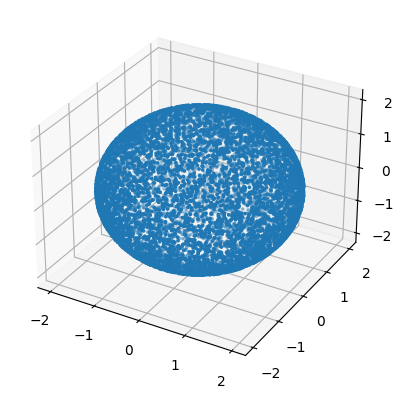

In [ ]:
# Sample graph for 2D Sphere
%matplotlib notebook
X_S_2d = sample_any_manifold(manifold_type="Sphere2d", n_points=n_points, R=R, file_name="S_2d.npy")
display_any_manifold(manifold_type = "Sphere2d", X = X_S_2d)
D_Sphere_2d = calculate_D_any_manifold(manifold_type="Sphere2d", X=X_S_2d)
np.save("D_S_2d.npy", D_Sphere_2d)
G_S_2d = RGG_any_manifold("Sphere2d", D_Sphere_2d, epsilon, X=X_S_2d, n_points=n_points)
pickle.dump(G_S_2d, open('G_S_2d.pickle', 'wb'))

In [ ]:
print(D_Sphere_2d)

[[0.         2.04590527 3.94830568 ... 1.22144874 3.31770773 2.59310559]
 [2.04590527 0.         2.73856801 ... 3.21315637 2.89917515 4.60629036]
 [3.94830568 2.73856801 0.         ... 4.03080873 4.53803795 4.65199535]
 ...
 [1.22144874 3.21315637 4.03080873 ... 0.         3.88139799 1.57732849]
 [3.31770773 2.89917515 4.53803795 ... 3.88139799 0.         3.23853134]
 [2.59310559 4.60629036 4.65199535 ... 1.57732849 3.23853134 0.        ]]


In [ ]:
D_0 = Rdist_array(2, X_S_2d)

3.5577770653620595
Rdist was nan
values were:  [-0.65433615  1.75594294  0.69893389] [-1.40047943  1.40656027  0.24544978] 3.5577770653620595
-3.900402041915829
Rdist was nan
values were:  [ 1.07577993 -1.68228879 -0.11225843] [-1.40047943  1.40656027  0.24544978] -3.900402041915829
-3.7363860551975625
Rdist was nan
values were:  [ 1.07577993 -1.68228879 -0.11225843] [-0.65433615  1.75594294  0.69893389] -3.7363860551975625
-3.781432904805839
Rdist was nan
values were:  [ 1.42856906 -1.11939252 -0.8403278 ] [-1.40047943  1.40656027  0.24544978] -3.781432904805839
-3.4876873620367244
Rdist was nan
values were:  [ 1.42856906 -1.11939252 -0.8403278 ] [-0.65433615  1.75594294  0.69893389] -3.4876873620367244
3.5143013076224987
Rdist was nan
values were:  [ 1.42856906 -1.11939252 -0.8403278 ] [ 1.07577993 -1.68228879 -0.11225843] 3.5143013076224987
2.115484802032381
Rdist was nan
values were:  [-1.86130807 -0.44995821  0.57712206] [-1.40047943  1.40656027  0.24544978] 2.115484802032381
0.83

<ipython-input-24-7eeb22534473>:7: RuntimeWarning: invalid value encountered in arccos
  Rdist = np.arccos(dotprod)


Streaming output truncated to the last 5000 lines.
1.8720514776929709
Rdist was nan
values were:  [-0.13816365 -1.48842389 -1.32872312] [ 1.67966402 -0.95856073 -0.50979417] 1.8720514776929709
-2.4467001390122944
Rdist was nan
values were:  [-0.13816365 -1.48842389 -1.32872312] [-0.49407255 -0.04002208  1.93759917] -2.4467001390122944
3.2177894736509507
Rdist was nan
values were:  [-0.13816365 -1.48842389 -1.32872312] [-0.39608416 -1.95061808 -0.19546473] 3.2177894736509507
2.1981440580078813
Rdist was nan
values were:  [-0.13816365 -1.48842389 -1.32872312] [-1.68952655 -1.01384945 -0.34294214] 2.1981440580078813
-1.4420947934089123
Rdist was nan
values were:  [-0.13816365 -1.48842389 -1.32872312] [-1.79371846  0.80188087  0.37357885] -1.4420947934089123
0.6504105236975973
0.0372124584919995
-3.903897175180279
Rdist was nan
values were:  [-0.13816365 -1.48842389 -1.32872312] [-0.0924752   1.71177414  1.03018329] -3.903897175180279
-2.1516767455347603
Rdist was nan
values were:  [-0.138

KeyboardInterrupt: ignored

In [ ]:
def find_Rdist(n, x1, x2):
    # x1, x2: two points on unit n-sphere
    # output: geodesic distance between x1 and x2
    dotprod = sum([x1[i]*x2[i] for i in range(n+1)])
    print(dotprod)
    try:
        Rdist = np.arccos(dotprod)
    except RuntimeWarning:
        print('Could not find arccos, values are: ', x1, x2, dotprod)
        return -1
    if math.isnan(Rdist):
        print("Rdist was nan")
        print("values were: ", x1, x2, dotprod)
    return Rdist

def Rdist_array(n, X):
    # n: sphere dimension
    # X: point cloud (rows are observations)
    # output: distance matrix
    N = X.shape[0]
    Rdist = np.zeros((N, N))
    for i in range(N):
        for j in range(i):
            x1 = X[i, :]
            x2 = X[j, :]
            R = np.linalg.norm(x1)
            x1_norm = x1/R
            x2_norm = x2/R
            Rdist[i, j] = find_Rdist(n, x1_norm, x2_norm)*R
            Rdist[j, i] = Rdist[i, j]
    return Rdist

In [ ]:
X_S_2d[0]

array([-1.37278552, -1.13279114,  0.91227417])

In [ ]:
X_S_2d[9999]

array([ 0.30563467,  1.28234733, -1.50405212])

In [ ]:
X_S_2d = np.load("/content/drive/MyDrive/Curvature Project/Calculated arrays/S_2d.npy")
print("X loaded")
display_any_manifold(manifold_type = "Sphere2d", X = X_S_2d)
D_Sphere_2d = np.load("/content/drive/MyDrive/Curvature Project/Calculated arrays/D_S_2d.npy")
print("D loaded")
G_S_2d = pickle.load(open("/content/drive/MyDrive/Curvature Project/Calculated arrays/G_S_2d.pickle", 'rb'))
print("G loaded")


print("Number of edges: ", len(G_S_2d.edges()))
print(D_Sphere_2d)
print(X_S_2d)
print(G_S_2d)

FileNotFoundError: ignored

In [ ]:
def pre_RGG_any_manifold(manifold_type, D, epsilon, n_points):
  G = nx.Graph() # note that G is an undirected graph
  e_weighted = []
  point_list = []
  for i in range(n_points):
    point_list.append((i, {"point_list": i}))
  G.add_nodes_from(point_list)
  for i in range(n_points):
    for j in range(i, n_points):
      if D[i][j] <= epsilon and i<j:
        e_weighted.append((i, j, D[i][j])) #because G is not directed, only need to store i,j
  G.add_weighted_edges_from(e_weighted)
  return G

In [ ]:
D_Sphere_2d.shape

(10000, 10000)

In [ ]:
D_Sphere_2d = np.load("/content/drive/MyDrive/Curvature Project/Calculated arrays/Copy of S2_Rdist_exact.npy")
print("D loaded")
print(D_Sphere_2d)
G_S_2d = pre_RGG_any_manifold("Sphere2d", D_Sphere_2d, epsilon=0.3, n_points=10000)
pickle.dump(G_S_2d, open('G_S_2d.pickle', 'wb'))


print("Number of edges: ", len(G_S_2d.edges()))
#print(D_Sphere_2d)
# print(X_S_2d)
print(G_S_2d)

D loaded
[[0.         1.12388407 1.84514253 ... 1.04103854 1.99192356 0.82497434]
 [1.12388407 0.         0.96989055 ... 1.9647105  3.04113401 0.65904568]
 [1.84514253 0.96989055 0.         ... 1.89353979 2.11529364 1.02144087]
 ...
 [1.04103854 1.9647105  1.89353979 ... 0.         1.1010456  1.32861638]
 [1.99192356 3.04113401 2.11529364 ... 1.1010456  0.         2.38984969]
 [0.82497434 0.65904568 1.02144087 ... 1.32861638 2.38984969 0.        ]]
Number of edges:  1116198
Graph with 10000 nodes and 1116198 edges


In [ ]:
# Sample graph for 2D
%matplotlib notebook
X_S_2d = sample_any_manifold(manifold_type="Sphere2d", n_points=n_points, R=R, file_name="S_2d.npy")
display_any_manifold(manifold_type = "Sphere2d", X = X_S_2d)
D_Sphere_2d = calculate_D_any_manifold(manifold_type="Sphere2d", X=X_S_2d)
np.save("D_S_2d.npy", D_Sphere_2d)
G_S_2d = RGG_any_manifold("Sphere2d", D_Sphere_2d, epsilon, X=X_S_2d, n_points=n_points)
pickle.dump(G_S_2d, open('G_S_2d.pickle', 'wb'))

In [ ]:
G_S.edges(data=True)

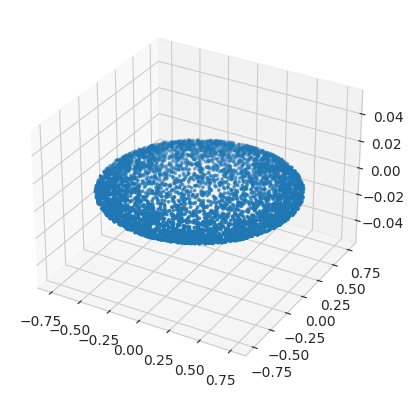

0
1000
2000
3000
4000


In [ ]:
# # Sample graph for PoincareDisk
# %matplotlib notebook
# X_P = sample_any_manifold(manifold_type="PoincareDisk", n_points=n_points, R=R, file_name="P.npy")
# display_any_manifold(manifold_type = "PoincareDisk", X = X_P)
# D_PoincareDisk = calculate_D_any_manifold(manifold_type="PoincareDisk", X=X_P)
# G_P = RGG_any_manifold("PoincareDisk", D_PoincareDisk, epsilon, X=X_P, n_points=n_points)

X loaded


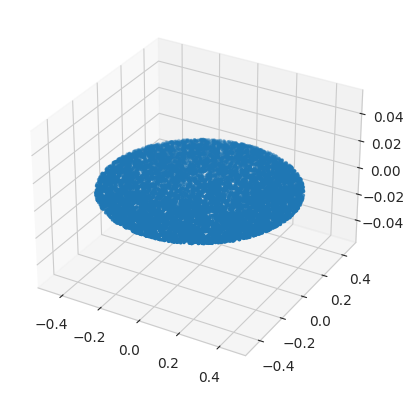

D loaded
G calculated
Number of edges:  3635688
[[0.         1.59740929 1.41281163 ... 1.74369076 0.73445491 0.73668071]
 [1.59740929 0.         0.92169619 ... 0.93984994 1.19945817 1.02260114]
 [1.41281163 0.92169619 0.         ... 1.67224587 0.73220997 0.67620253]
 ...
 [1.74369076 0.93984994 1.67224587 ... 0.         1.6393431  1.44898706]
 [0.73445491 1.19945817 0.73220997 ... 1.6393431  0.         0.19159993]
 [0.73668071 1.02260114 0.67620253 ... 1.44898706 0.19159993 0.        ]]
[[ 0.14264991 -0.4367052 ]
 [-0.05478067  0.28932114]
 [ 0.34632851  0.15899997]
 ...
 [-0.42905436  0.10320844]
 [ 0.29611782 -0.16283683]
 [ 0.21889399 -0.12185994]]
Graph with 10000 nodes and 3635688 edges


In [ ]:
X_P = np.load("/content/drive/MyDrive/Curvature Project/Calculated arrays/P.npy")
print("X loaded")
display_any_manifold(manifold_type = "PoincareDisk", X = X_P)
D_PoincareDisk = np.load("/content/drive/MyDrive/Curvature Project/Calculated arrays/D_P.npy")
print("D loaded")
G_P = RGG_any_manifold("PoincareDisk", D_PoincareDisk, epsilon=epsilon, X=X_P, n_points=n_points)
print("G calculated")

print("Number of edges: ", len(G_P.edges()))
print(D_PoincareDisk)
print(X_P)
print(G_P)

False
a =  2
c =  1
B =  2


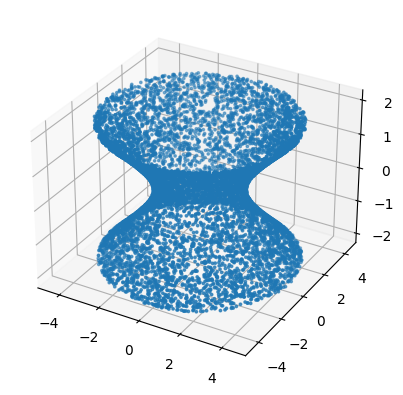

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


In [ ]:
# Sample graph for Hyperboloid
%matplotlib notebook
X_H = sample_any_manifold(manifold_type="Hyperboloid", n_points=n_points, R=R, file_name="H.npy")
display_any_manifold(manifold_type = "Hyperboloid", X = X_H)
D_Hyperboloid = calculate_D_any_manifold(manifold_type="Hyperboloid", X=X_H)
G_H = RGG_any_manifold("Hyperboloid", D_Hyperboloid, epsilon, X=X_H, n_points=n_points)

In [ ]:
np.save("D_H.npy", D_Hyperboloid)
pickle.dump(G_H, open('G_H.pickle', 'wb'))

In [ ]:
print(D_Hyperboloid)

[[0.         5.27878306 0.23890888 ... 5.13364039 2.27604475 1.32174687]
 [5.27878306 0.         5.07815931 ... 0.4427809  5.176718   5.23483059]
 [0.23890888 5.07815931 0.         ... 4.94066978 2.11163555 1.20108147]
 ...
 [5.13364039 0.4427809  4.94066978 ... 0.         5.19446599 5.10828229]
 [2.27604475 5.176718   2.11163555 ... 5.19446599 0.         1.70582383]
 [1.32174687 5.23483059 1.20108147 ... 5.10828229 1.70582383 0.        ]]


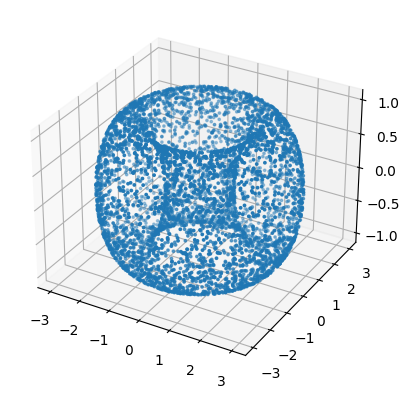

In [ ]:
# # Sample graph for Torus
# %matplotlib notebook
# X_T = sample_any_manifold(manifold_type="Torus", n_points=n_points, r=r, R=R, file_name="T.npy")
# display_any_manifold(manifold_type = "Torus", X = X_T)
# D_Torus = calculate_D_any_manifold(manifold_type="Torus", X=X_T)
# G_T = RGG_any_manifold("Torus", D_Torus, epsilon, X=X_T, n_points=n_points)

X loaded


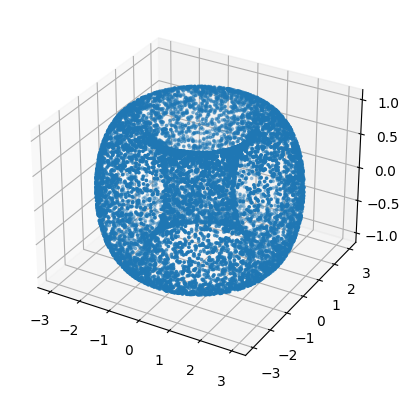

D loaded
G calculated
Number of edges:  179483
[[0.         3.88608979 5.40120165 ... 5.8741956  1.28947112 4.38156024]
 [3.88608979 0.         3.46978605 ... 3.14004102 4.56698884 3.54333708]
 [5.40120165 3.46978605 0.         ... 1.18595575 5.2141547  2.63331601]
 ...
 [5.8741956  3.14004102 1.18595575 ... 0.         5.89601111 2.91552919]
 [1.28947112 4.56698884 5.2141547  ... 5.89601111 0.         4.10215355]
 [4.38156024 3.54333708 2.63331601 ... 2.91552919 4.10215355 0.        ]]
[[-0.09234865  2.98609087  0.1575029 ]
 [ 2.27584799  0.01162938  0.96119275]
 [ 0.48797826 -2.26900292 -0.94711891]
 ...
 [ 1.2142908  -2.73357674 -0.13278955]
 [-1.1814644   2.64483654 -0.44258721]
 [-1.04555622 -1.22199156  0.92006947]]
Graph with 10000 nodes and 179483 edges


In [ ]:
X_T = np.load("/content/drive/MyDrive/Curvature Project/T.npy")
print("X loaded")
display_any_manifold(manifold_type = "Torus", X = X_T)
D_Torus = np.load("/content/drive/MyDrive/Curvature Project/D_T.npy")
print("D loaded")
G_T = RGG_any_manifold("Torus", D_Torus, epsilon=epsilon, X=X_T, n_points=n_points)
print("G calculated")

print("Number of edges: ", len(G_T.edges()))
print(D_Torus)
print(X_T)
print(G_T)

In [ ]:
X_FT = np.load("/content/drive/MyDrive/Curvature Project/Calculated arrays/FT.npy")
print("X loaded")
display_any_manifold(manifold_type = "FlatTorus", X = X_FT)
D_FlatTorus = np.load("/content/drive/MyDrive/Curvature Project/Calculated arrays/D_FT.npy")
print("D loaded")
G_FT = RGG_any_manifold("FlatTorus", D_FlatTorus, epsilon=epsilon, X=X_FT, n_points=n_points)
print("G calculated")

print("Number of edges: ", len(G_FT.edges()))
print(D_FlatTorus)
print(X_FT)
print(G_FT)

X loaded


<Figure size 640x480 with 0 Axes>

D loaded


**Descr**

X_E = (5000x3) array of coordinates of sampled points

D_Euclidean = (n_points x n_points) array of distances

In [ ]:
a = 2
N = 9
x, y = [], []
for i in range(N):
    x += [np.random.random()*a]
    y += [np.random.random()*a]
X = np.array([[[x[i], y[i]] for i in range(N)]])
X

array([[[0.21979937, 1.20741831],
        [1.60041757, 1.59712234],
        [0.11729266, 1.76187864],
        [0.93238834, 1.9373362 ],
        [0.02324273, 0.89787518],
        [0.11694791, 1.45664871],
        [1.23954516, 0.41534962],
        [0.07287713, 0.74749607],
        [0.32835362, 0.1593362 ]]])

In [ ]:
X = X[0]
N = X.shape[0]
D = np.zeros((N, N))
print(D)
hor_vector = [a, 0]
ver_vector = [0, a]
for i in range(N):
  x = X[i, :]
  for j in range(i):
    y = X[j, :]
    d1 = np.linalg.norm(x - y)
    d2 = np.linalg.norm(x - y + hor_vector)
    d3 = np.linalg.norm(x- y - hor_vector)
    d4 = np.linalg.norm(x - y + ver_vector)
    d5 = np.linalg.norm(x- y - ver_vector)
    D[i, j] = min(d1, d2, d3, d4, d5)
    D[j, i] = D[i, j]

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
D

array([[0.        , 0.73178074, 0.56385626, 1.02007999, 0.36667624,
        0.26961865, 1.26026629, 0.48281944, 0.95808752],
       [0.73178074, 0.        , 0.54249839, 0.74967227, 0.81714607,
        0.53529098, 0.89427333, 0.97215371, 1.39076638],
       [0.56385626, 0.54249839, 0.        , 0.83376635, 0.86910723,
        0.30523013, 1.29864352, 0.98661769, 0.45002138],
       [1.02007999, 0.74967227, 0.83376635, 0.        , 1.32256602,
        0.94657465, 0.56819199, 1.18115136, 0.64353862],
       [0.36667624, 0.81714607, 0.86910723, 1.32256602, 0.        ,
        0.56657614, 0.92033297, 0.15835861, 0.79908227],
       [0.26961865, 0.53529098, 0.30523013, 0.94657465, 0.56657614,
        0.        , 1.36166786, 0.71052072, 0.73379976],
       [1.26026629, 0.89427333, 1.29864352, 0.56819199, 0.92033297,
        1.36166786, 0.        , 0.89708608, 0.94647393],
       [0.48281944, 0.97215371, 0.98661769, 1.18115136, 0.15835861,
        0.71052072, 0.89708608, 0.        , 0.64124899],


# Calculate ORC

In [12]:
!pip install GraphRicciCurvature
!pip install scikit-learn

import importlib
# matplotlib setting
%matplotlib inline

# # to print logs in jupyter notebook
# import logging
# logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

from GraphRicciCurvature.OllivierRicci import OllivierRicci
# load python-louvain for modularity computation
# import community as community_louvain

# for ARI computation
from sklearn import preprocessing, metrics

import GraphRicciCurvature
print(GraphRicciCurvature.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 790.0/790.0 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 51.8 MB/s eta 0:00:00


0.5.3.1


/usr/local/lib/python3.10/dist-packages/ot/backend.py:2998: UserWarning: To use TensorflowBackend, you need to activate the tensorflow numpy API. You can activate it by running: 
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
  register_backend(TensorflowBackend())


In [13]:
import statistics
def calculate_ORC_any_manifold(G_for_orc):
  orc = OllivierRicci(G_for_orc, alpha=0, verbose="TRACE")
  orc.compute_ricci_curvature()
  G_orc = orc.G.copy()
  #show_results
  # Print the first thirty results
  print("G, first 100 edges: ")
  for n1,n2 in list(G_orc.edges())[:100]:
      print("Ollivier-Ricci curvature of edge (%s,%s) is %f" % (n1 ,n2, G_orc[n1][n2]["ricciCurvature"]))

  # Plot the histogram of Ricci curvatures
  plt.subplot(2, 1, 1)
  ricci_curvtures = nx.get_edge_attributes(G_orc, "ricciCurvature").values()
  plt.hist(ricci_curvtures,bins=30)
  plt.xlabel('Ricci curvature')
  plt.title("Histogram of Ricci Curvatures")

  # Plot the histogram of edge weights
  plt.subplot(2, 1, 2)
  weights = nx.get_edge_attributes(G_orc, "weight").values()
  plt.hist(weights,bins=20)
  plt.xlabel('Edge weight')
  plt.title("Histogram of Edge weights")

  plt.tight_layout()

  return G_orc

In [21]:
def calculate_ORSC_any_manifold(G_orc, d, epsilon):

  dict_orsc = {}
  list_nodes = list(G_orc.nodes())
  for n1 in list_nodes:
    n_neighbours = len(list(nx.edges(G_orc, n1))) # number nodes adjacent to n1 (checked)
    sum = 0 # sum of adjacent edges's ORC
    for i in range(n_neighbours):
      n2 = list(nx.edges(G_orc, n1))[i][1] # checked
      sum += G_orc[n1][n2]["ricciCurvature"]
    if n_neighbours != 0:
      dict_orsc[n1] = (sum / n_neighbours) * (2*(d+2)/(epsilon**2))
    else:
      print("node of 0 degree")
      dict_orsc[n1] = 0

  nx.set_node_attributes(G_orc, dict_orsc, name = "oliverDiscreteRicciCurvature")
  # Print the first 30 results
  print("ORSC, first 30 nodes: ")
  orsc_nodes = nx.get_node_attributes(G_orc, "oliverDiscreteRicciCurvature")
  i = 0
  for n1 in list(G_orc.nodes())[:45]:
    print("Discrete Ollivier-Ricci curvature of node %s is %f" % (n1, orsc_nodes[i]))
    i += 1

  # Plot the histogram of Ricci curvatures
  plt.subplot(2, 1, 1)
  # discrete_ricci_curvtures = nx.get_node_attributes(G_orc, "oliverDiscreteRicciCurvature").values()
  plt.hist(orsc_nodes.values(),bins=25)
  plt.xlabel('ORSC curvature')
  plt.title("Histogram of Scalar Ricci Curvatures")
  plt.tight_layout()

  orsc_arr = dict_orsc.values()
  mean = statistics.mean(orsc_arr)
  print("Mean discrete Ricci Curvature over nodes is ", mean)
  std = statistics.stdev(orsc_arr)
  print("Standard deviation ", std)

  return G_orc

TRACE:GraphRicciCurvature:Number of nodes: 10000
TRACE:GraphRicciCurvature:Number of edges: 108080
TRACE:GraphRicciCurvature:Start to compute all pair shortest path.
TRACE:GraphRicciCurvature:73.266392 secs for all pair by NetworKit.
INFO:GraphRicciCurvature:43.856327 secs for Ricci curvature computation.


G, first 100 edges: 
Ollivier-Ricci curvature of edge (0,2) is 0.039438
Ollivier-Ricci curvature of edge (0,240) is -0.011731
Ollivier-Ricci curvature of edge (0,369) is 0.084525
Ollivier-Ricci curvature of edge (0,578) is -0.127855
Ollivier-Ricci curvature of edge (0,1223) is 0.121194
Ollivier-Ricci curvature of edge (0,1317) is 0.109478
Ollivier-Ricci curvature of edge (0,1442) is -0.050268
Ollivier-Ricci curvature of edge (0,1895) is -0.109907
Ollivier-Ricci curvature of edge (0,2011) is 0.022303
Ollivier-Ricci curvature of edge (0,2345) is -0.038682
Ollivier-Ricci curvature of edge (0,2796) is 0.093995
Ollivier-Ricci curvature of edge (0,3024) is 0.092398
Ollivier-Ricci curvature of edge (0,3395) is 0.119364
Ollivier-Ricci curvature of edge (0,3459) is 0.028351
Ollivier-Ricci curvature of edge (0,3811) is 0.100568
Ollivier-Ricci curvature of edge (0,3905) is -0.219011
Ollivier-Ricci curvature of edge (0,4130) is 0.202950
Ollivier-Ricci curvature of edge (0,5379) is -0.000287
Ollivi

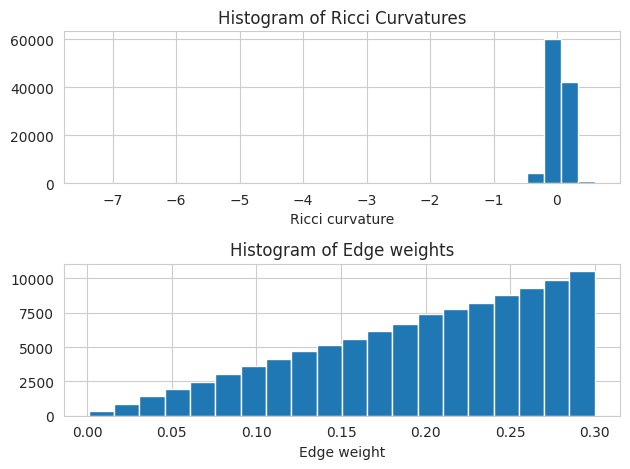

In [ ]:
H_orc = calculate_ORC_any_manifold(G_H)

ORSC, first 30 nodes: 
Discrete Ollivier-Ricci curvature of node 0 is 2.300856
Discrete Ollivier-Ricci curvature of node 1 is 12.824243
Discrete Ollivier-Ricci curvature of node 2 is 5.666997
Discrete Ollivier-Ricci curvature of node 3 is 3.229854
Discrete Ollivier-Ricci curvature of node 4 is 10.495982
Discrete Ollivier-Ricci curvature of node 5 is 6.058977
Discrete Ollivier-Ricci curvature of node 6 is -4.170994
Discrete Ollivier-Ricci curvature of node 7 is 16.907812
Discrete Ollivier-Ricci curvature of node 8 is 7.760778
Discrete Ollivier-Ricci curvature of node 9 is 2.758091
Discrete Ollivier-Ricci curvature of node 10 is 0.297819
Discrete Ollivier-Ricci curvature of node 11 is -0.661732
Discrete Ollivier-Ricci curvature of node 12 is -7.186237
Discrete Ollivier-Ricci curvature of node 13 is 8.308939
Discrete Ollivier-Ricci curvature of node 14 is 3.900390
Discrete Ollivier-Ricci curvature of node 15 is -7.267160
Discrete Ollivier-Ricci curvature of node 16 is -2.330791
Discrete O

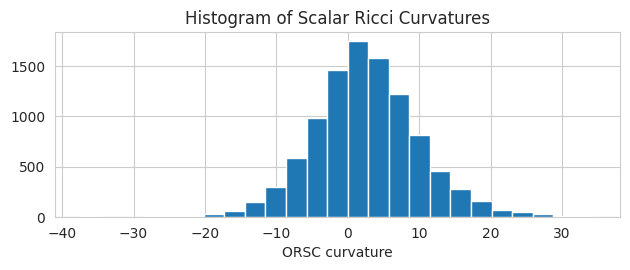

In [ ]:
H_orsc = calculate_ORSC_any_manifold(H_orc, d=3, epsilon=0.3)

TRACE:GraphRicciCurvature:Number of nodes: 10000
TRACE:GraphRicciCurvature:Number of edges: 154361
TRACE:GraphRicciCurvature:Start to compute all pair shortest path.
TRACE:GraphRicciCurvature:60.980928 secs for all pair by NetworKit.
INFO:GraphRicciCurvature:126.331198 secs for Ricci curvature computation.


G, first 100 edges: 
Ollivier-Ricci curvature of edge (0,284) is -0.277872
Ollivier-Ricci curvature of edge (0,646) is -0.171338
Ollivier-Ricci curvature of edge (0,695) is -0.082585
Ollivier-Ricci curvature of edge (0,1267) is -0.330872
Ollivier-Ricci curvature of edge (0,1632) is -0.464754
Ollivier-Ricci curvature of edge (0,2370) is -0.028639
Ollivier-Ricci curvature of edge (0,2693) is -0.101174
Ollivier-Ricci curvature of edge (0,2902) is -0.000445
Ollivier-Ricci curvature of edge (0,2990) is -0.315371
Ollivier-Ricci curvature of edge (0,3325) is -0.576586
Ollivier-Ricci curvature of edge (0,3397) is -0.305161
Ollivier-Ricci curvature of edge (0,3775) is -0.112160
Ollivier-Ricci curvature of edge (0,4032) is -0.004966
Ollivier-Ricci curvature of edge (0,4350) is -0.093164
Ollivier-Ricci curvature of edge (0,4667) is -0.171095
Ollivier-Ricci curvature of edge (0,6953) is -0.073875
Ollivier-Ricci curvature of edge (0,7293) is -0.229271
Ollivier-Ricci curvature of edge (0,7358) is -0

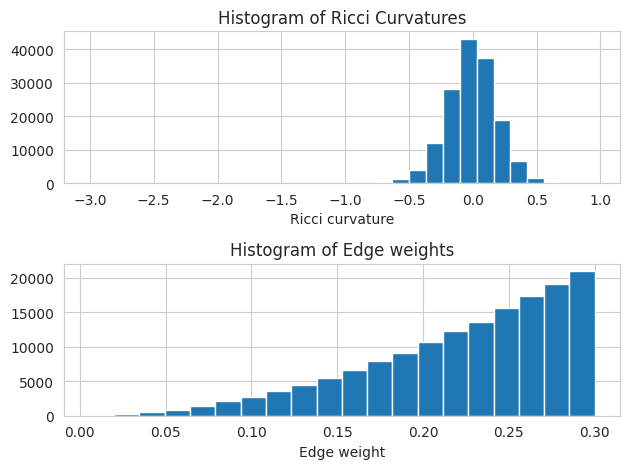

In [15]:
E_orc = calculate_ORC_any_manifold(G_E)

In [ ]:
 # pickle.dump(E_orc, open('E_orc.pickle', 'wb')) # RGGs with Ricci curvature attributes on the edges

In [ ]:
list(nx.edges(E_orc, 0))

NameError: ignored

ORSC, first 30 nodes: 
Discrete Ollivier-Ricci curvature of node 0 is -22.218603
Discrete Ollivier-Ricci curvature of node 1 is -12.428535
Discrete Ollivier-Ricci curvature of node 2 is -0.132912
Discrete Ollivier-Ricci curvature of node 3 is -8.904238
Discrete Ollivier-Ricci curvature of node 4 is -12.149142
Discrete Ollivier-Ricci curvature of node 5 is 6.245725
Discrete Ollivier-Ricci curvature of node 6 is 8.565033
Discrete Ollivier-Ricci curvature of node 7 is -13.861800
Discrete Ollivier-Ricci curvature of node 8 is 2.690451
Discrete Ollivier-Ricci curvature of node 9 is 0.102915
Discrete Ollivier-Ricci curvature of node 10 is 2.708974
Discrete Ollivier-Ricci curvature of node 11 is -9.680347
Discrete Ollivier-Ricci curvature of node 12 is 6.592403
Discrete Ollivier-Ricci curvature of node 13 is 26.282465
Discrete Ollivier-Ricci curvature of node 14 is -10.155110
Discrete Ollivier-Ricci curvature of node 15 is 4.075543
Discrete Ollivier-Ricci curvature of node 16 is -10.111250
Di

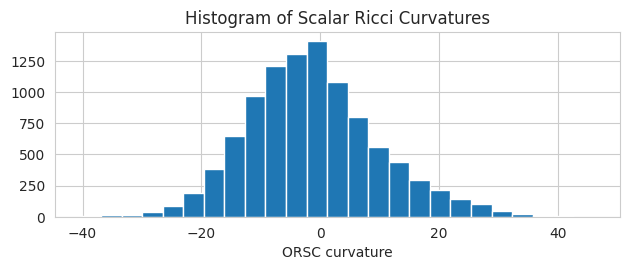

In [16]:
E_orsc = calculate_ORSC_any_manifold(E_orc, d=3, epsilon=0.3)

ORSC, first 30 nodes: 
Discrete Ollivier-Ricci curvature of node 0 is -22.218603
Discrete Ollivier-Ricci curvature of node 1 is -12.428535
Discrete Ollivier-Ricci curvature of node 2 is -0.132912
Discrete Ollivier-Ricci curvature of node 3 is -8.904238
Discrete Ollivier-Ricci curvature of node 4 is -12.149142
Discrete Ollivier-Ricci curvature of node 5 is 6.245725
Discrete Ollivier-Ricci curvature of node 6 is 8.565033
Discrete Ollivier-Ricci curvature of node 7 is -13.861800
Discrete Ollivier-Ricci curvature of node 8 is 2.690451
Discrete Ollivier-Ricci curvature of node 9 is 0.102915
Discrete Ollivier-Ricci curvature of node 10 is 2.708974
Discrete Ollivier-Ricci curvature of node 11 is -9.680347
Discrete Ollivier-Ricci curvature of node 12 is 6.592403
Discrete Ollivier-Ricci curvature of node 13 is 26.282465
Discrete Ollivier-Ricci curvature of node 14 is -10.155110
Discrete Ollivier-Ricci curvature of node 15 is 4.075543
Discrete Ollivier-Ricci curvature of node 16 is -10.111250
Di

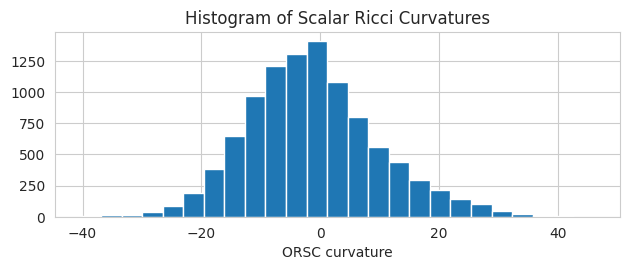

In [22]:
E_orsc = calculate_ORSC_any_manifold(E_orc, d=3, epsilon=0.3)

-1.216484294283096
11.100989346448928


In [ ]:
nx.get_node_attributes(E_orsc, "oliverDiscreteRicciCurvature")

{0: -11.093820203680588,
 1: -6.181728751151822,
 2: 0.03460644369363409,
 3: -4.270026681822599,
 4: -6.0483318265057875,
 5: 3.319062512537043,
 6: 4.686163907019363,
 7: -6.910966936977019,
 8: 1.4309533416813531,
 9: 0.4938370480571517,
 10: 1.495681859610574,
 11: -4.826960019108981,
 12: 3.3403517201252475,
 13: 13.7770417862656,
 14: -5.057598015363259,
 15: 2.462073411462503,
 16: -4.9806270172141645,
 17: 5.663731312632546,
 18: 14.458816108976816,
 19: 5.221555777793387,
 20: 3.0724825461273273,
 21: 10.856570950577897,
 22: -4.975981117615607,
 23: 0.5957679264328928,
 24: 4.638964454977608,
 25: -0.10942569656494003,
 26: -9.359739179750136,
 27: -6.706709425850612,
 28: -3.453215692774046,
 29: -4.705228710829912,
 30: 12.257895639645017,
 31: 8.041685939069447,
 32: -7.289636867905528,
 33: 4.846850044384696,
 34: -3.5317276556089663,
 35: -6.8916359448421565,
 36: -0.17315340359802706,
 37: -1.9649166821737178,
 38: -9.01102607325154,
 39: -0.2460450399738306,
 40: -0.90

In [ ]:
# pickle.dump(E_orsc, open('E_orsc.pickle', 'wb')) # RGGs with Ricci curvature edge attributes on the edges and Discrete Ricci node attributes

In [ ]:
E_orsc_loaded = pickle.load(open("/content/drive/MyDrive/Curvature Project/Calculated arrays/E_orsc.pickle", 'rb'))

In [ ]:
nx.get_node_attributes(E_orsc_loaded, "oliverDiscreteRicciCurvature")

{0: -11.093820203680588,
 1: -6.181728751151822,
 2: 0.03460644369363409,
 3: -4.270026681822599,
 4: -6.0483318265057875,
 5: 3.319062512537043,
 6: 4.686163907019363,
 7: -6.910966936977019,
 8: 1.4309533416813531,
 9: 0.4938370480571517,
 10: 1.495681859610574,
 11: -4.826960019108981,
 12: 3.3403517201252475,
 13: 13.7770417862656,
 14: -5.057598015363259,
 15: 2.462073411462503,
 16: -4.9806270172141645,
 17: 5.663731312632546,
 18: 14.458816108976816,
 19: 5.221555777793387,
 20: 3.0724825461273273,
 21: 10.856570950577897,
 22: -4.975981117615607,
 23: 0.5957679264328928,
 24: 4.638964454977608,
 25: -0.10942569656494003,
 26: -9.359739179750136,
 27: -6.706709425850612,
 28: -3.453215692774046,
 29: -4.705228710829912,
 30: 12.257895639645017,
 31: 8.041685939069447,
 32: -7.289636867905528,
 33: 4.846850044384696,
 34: -3.5317276556089663,
 35: -6.8916359448421565,
 36: -0.17315340359802706,
 37: -1.9649166821737178,
 38: -9.01102607325154,
 39: -0.2460450399738306,
 40: -0.90

TRACE:GraphRicciCurvature:Number of nodes: 10000
TRACE:GraphRicciCurvature:Number of edges: 281745
TRACE:GraphRicciCurvature:Start to compute all pair shortest path.
TRACE:GraphRicciCurvature:76.835100 secs for all pair by NetworKit.
INFO:GraphRicciCurvature:265.011052 secs for Ricci curvature computation.


G, first 100 edges: 
Ollivier-Ricci curvature of edge (0,181) is -0.148242
Ollivier-Ricci curvature of edge (0,362) is 0.034919
Ollivier-Ricci curvature of edge (0,855) is -0.015502
Ollivier-Ricci curvature of edge (0,877) is 0.041579
Ollivier-Ricci curvature of edge (0,975) is 0.033293
Ollivier-Ricci curvature of edge (0,1405) is 0.001796
Ollivier-Ricci curvature of edge (0,1553) is -0.066876
Ollivier-Ricci curvature of edge (0,1642) is 0.024122
Ollivier-Ricci curvature of edge (0,1752) is 0.023685
Ollivier-Ricci curvature of edge (0,1780) is 0.058106
Ollivier-Ricci curvature of edge (0,1933) is 0.017449
Ollivier-Ricci curvature of edge (0,1976) is -0.084488
Ollivier-Ricci curvature of edge (0,1982) is 0.054625
Ollivier-Ricci curvature of edge (0,2146) is -0.055730
Ollivier-Ricci curvature of edge (0,2441) is 0.045659
Ollivier-Ricci curvature of edge (0,2487) is 0.034221
Ollivier-Ricci curvature of edge (0,2530) is 0.022287
Ollivier-Ricci curvature of edge (0,3722) is 0.059802
Ollivie

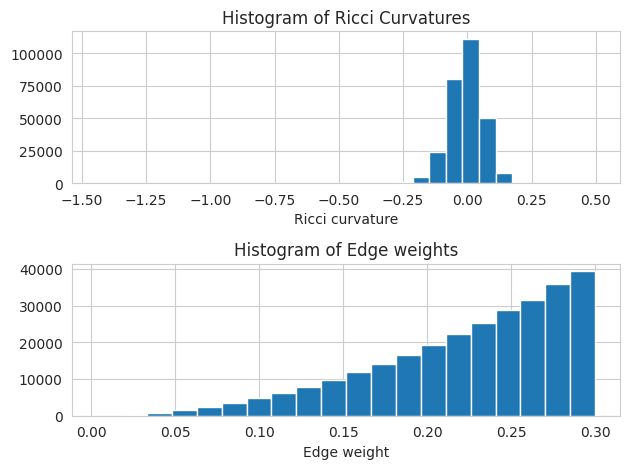

In [ ]:
S_orc = calculate_ORC_any_manifold(G_S)

In [ ]:
# list(nx.edges(S_orc, 0))

[(0, 181),
 (0, 362),
 (0, 855),
 (0, 877),
 (0, 975),
 (0, 1405),
 (0, 1553),
 (0, 1642),
 (0, 1752),
 (0, 1780),
 (0, 1933),
 (0, 1976),
 (0, 1982),
 (0, 2146),
 (0, 2441),
 (0, 2487),
 (0, 2530),
 (0, 3722),
 (0, 3839),
 (0, 4017),
 (0, 4021),
 (0, 4554),
 (0, 4691),
 (0, 4761),
 (0, 4783),
 (0, 4843),
 (0, 5014),
 (0, 5057),
 (0, 5192),
 (0, 5458),
 (0, 5572),
 (0, 5594),
 (0, 5671),
 (0, 5872),
 (0, 5918),
 (0, 6026),
 (0, 6156),
 (0, 6180),
 (0, 6265),
 (0, 6450),
 (0, 6765),
 (0, 7308),
 (0, 7792),
 (0, 7915),
 (0, 8050),
 (0, 8864),
 (0, 8871),
 (0, 9109),
 (0, 9320),
 (0, 9491),
 (0, 9510),
 (0, 9989)]

ORSC, first 30 nodes: 
Discrete Ollivier-Ricci curvature of node 0 is -0.005978
Discrete Ollivier-Ricci curvature of node 1 is 0.011181
Discrete Ollivier-Ricci curvature of node 2 is 0.015109
Discrete Ollivier-Ricci curvature of node 3 is -0.007776
Discrete Ollivier-Ricci curvature of node 4 is -0.023681
Discrete Ollivier-Ricci curvature of node 5 is -0.003757
Discrete Ollivier-Ricci curvature of node 6 is -0.014754
Discrete Ollivier-Ricci curvature of node 7 is -0.013159
Discrete Ollivier-Ricci curvature of node 8 is -0.036598
Discrete Ollivier-Ricci curvature of node 9 is -0.002792
Discrete Ollivier-Ricci curvature of node 10 is -0.003031
Discrete Ollivier-Ricci curvature of node 11 is 0.010191
Discrete Ollivier-Ricci curvature of node 12 is -0.058950
Discrete Ollivier-Ricci curvature of node 13 is 0.012326
Discrete Ollivier-Ricci curvature of node 14 is 0.031375
Discrete Ollivier-Ricci curvature of node 15 is -0.005200
Discrete Ollivier-Ricci curvature of node 16 is -0.010470
Discre

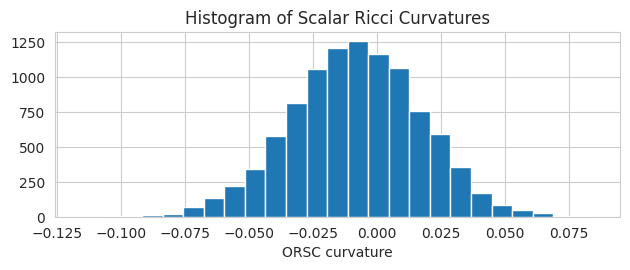

In [ ]:
S_orsc = calculate_ORSC_any_manifold(S_orc, d=3, epsilon=0.3)

In [ ]:
nx.get_node_attributes(S_orc, "oliverDiscreteRicciCurvature")

{0: -0.005977552589567354,
 1: 0.011181453802270128,
 2: 0.015108739942104732,
 3: -0.007775910038533798,
 4: -0.023681371243039366,
 5: -0.0037565093958930674,
 6: -0.014754070769603597,
 7: -0.013158932338794492,
 8: -0.03659837776550167,
 9: -0.002791687722195383,
 10: -0.0030312213519302737,
 11: 0.010191089674964637,
 12: -0.05894962126739598,
 13: 0.012326483877637318,
 14: 0.03137462460139074,
 15: -0.0052004050420259625,
 16: -0.010469635112960353,
 17: -0.01748363287414673,
 18: -0.009565130539967241,
 19: -0.04184033583014653,
 20: 0.0097378177275492,
 21: -0.04492035338617098,
 22: 0.01569389410612962,
 23: -0.03714007829697864,
 24: -0.01666051169758736,
 25: -0.034360782028680634,
 26: -0.028896617683939335,
 27: -0.02612469126544405,
 28: 0.0016183707167860696,
 29: 0.044810447166283275,
 30: 0.026909788006732754,
 31: 0.04663096344666247,
 32: -0.01587818276476177,
 33: 0.023377547723110723,
 34: 0.03920518045893955,
 35: -0.0042608532373495656,
 36: -0.01466608514516221

In [ ]:
nx.get_node_attributes(S_orc, "oliverDiscreteRicciCurvature").values()

dict_values([-0.005977552589567354, 0.011181453802270128, 0.015108739942104732, -0.007775910038533798, -0.023681371243039366, -0.0037565093958930674, -0.014754070769603597, -0.013158932338794492, -0.03659837776550167, -0.002791687722195383, -0.0030312213519302737, 0.010191089674964637, -0.05894962126739598, 0.012326483877637318, 0.03137462460139074, -0.0052004050420259625, -0.010469635112960353, -0.01748363287414673, -0.009565130539967241, -0.04184033583014653, 0.0097378177275492, -0.04492035338617098, 0.01569389410612962, -0.03714007829697864, -0.01666051169758736, -0.034360782028680634, -0.028896617683939335, -0.02612469126544405, 0.0016183707167860696, 0.044810447166283275, 0.026909788006732754, 0.04663096344666247, -0.01587818276476177, 0.023377547723110723, 0.03920518045893955, -0.0042608532373495656, -0.014666085145162214, -0.009864325465969036, -0.012366581633981756, 0.014409807475875879, 0.007261066430089629, 0.005526234989182271, 0.0034383024257993037, 0.0485628492244949, -0.0

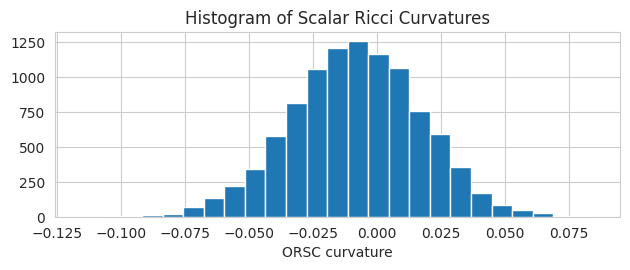

In [ ]:
# Plot the histogram of Ricci curvatures
plt.subplot(2, 1, 1)
orsc_nodes = nx.get_node_attributes(S_orc, "oliverDiscreteRicciCurvature").values()
plt.hist(orsc_nodes,bins=25)
plt.xlabel('ORSC curvature')
plt.title("Histogram of Scalar Ricci Curvatures")

plt.tight_layout()

TRACE:GraphRicciCurvature:Number of nodes: 10000
TRACE:GraphRicciCurvature:Number of edges: 179483
TRACE:GraphRicciCurvature:Start to compute all pair shortest path.
TRACE:GraphRicciCurvature:70.024501 secs for all pair by NetworKit.
INFO:GraphRicciCurvature:104.849758 secs for Ricci curvature computation.


G_E, first 100 edges: 
Ollivier-Ricci curvature of edge (0,821) is 0.133715
Ollivier-Ricci curvature of edge (0,988) is 0.085864
Ollivier-Ricci curvature of edge (0,1261) is -0.017992
Ollivier-Ricci curvature of edge (0,1548) is 0.096473
Ollivier-Ricci curvature of edge (0,1772) is 0.024649
Ollivier-Ricci curvature of edge (0,2083) is 0.149910
Ollivier-Ricci curvature of edge (0,2087) is -0.143947
Ollivier-Ricci curvature of edge (0,2158) is -0.001980
Ollivier-Ricci curvature of edge (0,2162) is -0.075693
Ollivier-Ricci curvature of edge (0,2425) is 0.050927
Ollivier-Ricci curvature of edge (0,3302) is 0.037548
Ollivier-Ricci curvature of edge (0,3830) is -0.161220
Ollivier-Ricci curvature of edge (0,3905) is -0.020142
Ollivier-Ricci curvature of edge (0,4126) is -0.202316
Ollivier-Ricci curvature of edge (0,4192) is 0.017765
Ollivier-Ricci curvature of edge (0,4381) is 0.039005
Ollivier-Ricci curvature of edge (0,4518) is -0.129500
Ollivier-Ricci curvature of edge (0,5235) is -0.19088

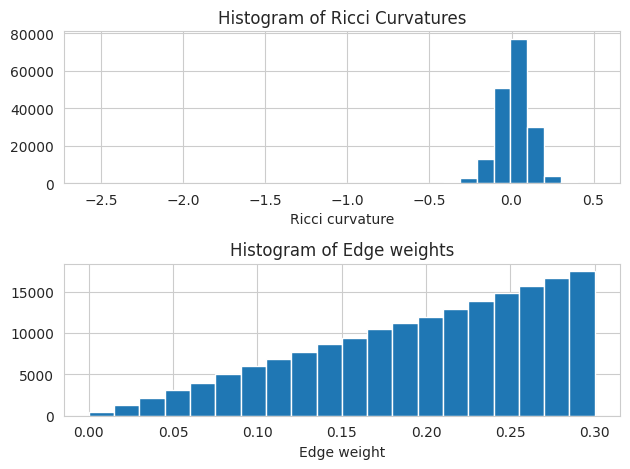

In [ ]:
T_orc = calculate_ORC_any_manifold(G_T)

ORSC, first 30 nodes: 
Discrete Ollivier-Ricci curvature of node 0 is 0.002741
Discrete Ollivier-Ricci curvature of node 1 is 0.026960
Discrete Ollivier-Ricci curvature of node 2 is 0.068432
Discrete Ollivier-Ricci curvature of node 3 is -0.020671
Discrete Ollivier-Ricci curvature of node 4 is 0.013495
Discrete Ollivier-Ricci curvature of node 5 is 0.020635
Discrete Ollivier-Ricci curvature of node 6 is 0.084723
Discrete Ollivier-Ricci curvature of node 7 is 0.017211
Discrete Ollivier-Ricci curvature of node 8 is -0.041730
Discrete Ollivier-Ricci curvature of node 9 is -0.011320
Discrete Ollivier-Ricci curvature of node 10 is -0.006291
Discrete Ollivier-Ricci curvature of node 11 is 0.011978
Discrete Ollivier-Ricci curvature of node 12 is 0.012655
Discrete Ollivier-Ricci curvature of node 13 is 0.054127
Discrete Ollivier-Ricci curvature of node 14 is 0.017513
Discrete Ollivier-Ricci curvature of node 15 is 0.060446
Discrete Ollivier-Ricci curvature of node 16 is -0.045654
Discrete Olli

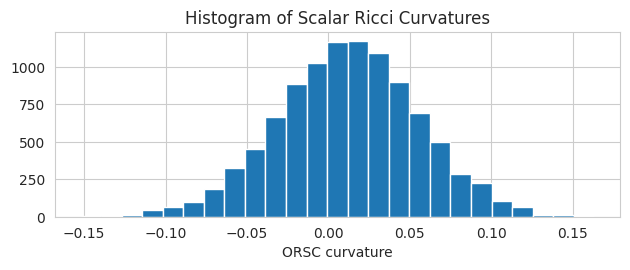

In [ ]:
T_orsc = calculate_ORSC_any_manifold(T_orc)

TRACE:GraphRicciCurvature:Number of nodes: 10000
TRACE:GraphRicciCurvature:Number of edges: 280614
TRACE:GraphRicciCurvature:Start to compute all pair shortest path.
TRACE:GraphRicciCurvature:112.760771 secs for all pair by NetworKit.
INFO:GraphRicciCurvature:273.890016 secs for Ricci curvature computation.


G, first 100 edges: 
Ollivier-Ricci curvature of edge (0,43) is 0.077607
Ollivier-Ricci curvature of edge (0,66) is -0.014482
Ollivier-Ricci curvature of edge (0,76) is -0.014652
Ollivier-Ricci curvature of edge (0,367) is 0.035550
Ollivier-Ricci curvature of edge (0,478) is 0.056745
Ollivier-Ricci curvature of edge (0,961) is 0.021487
Ollivier-Ricci curvature of edge (0,1520) is 0.020352
Ollivier-Ricci curvature of edge (0,1571) is 0.004045
Ollivier-Ricci curvature of edge (0,1765) is -0.008484
Ollivier-Ricci curvature of edge (0,2299) is 0.112502
Ollivier-Ricci curvature of edge (0,2353) is 0.073833
Ollivier-Ricci curvature of edge (0,2625) is 0.023799
Ollivier-Ricci curvature of edge (0,3000) is 0.025206
Ollivier-Ricci curvature of edge (0,3013) is 0.015987
Ollivier-Ricci curvature of edge (0,3122) is 0.032728
Ollivier-Ricci curvature of edge (0,3169) is 0.059024
Ollivier-Ricci curvature of edge (0,3353) is -0.025634
Ollivier-Ricci curvature of edge (0,3500) is 0.079403
Ollivier-Ric

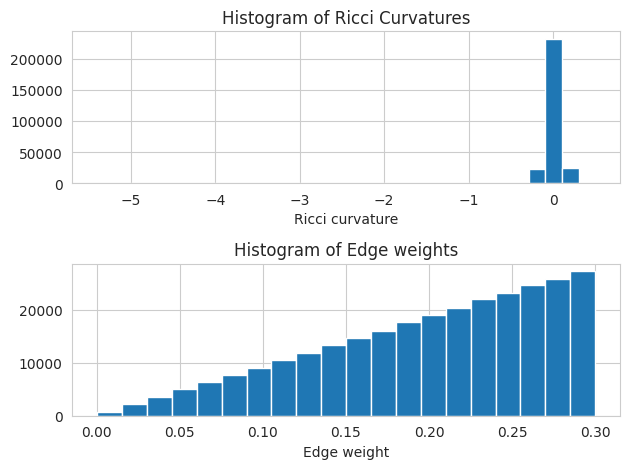

In [ ]:
S_2d_orc = calculate_ORC_any_manifold(G_S_2d)

ORSC, first 30 nodes: 
Discrete Ollivier-Ricci curvature of node 0 is 3.253736
Discrete Ollivier-Ricci curvature of node 1 is -0.194537
Discrete Ollivier-Ricci curvature of node 2 is 3.327480
Discrete Ollivier-Ricci curvature of node 3 is 4.219980
Discrete Ollivier-Ricci curvature of node 4 is 2.650381
Discrete Ollivier-Ricci curvature of node 5 is 1.617904
Discrete Ollivier-Ricci curvature of node 6 is 2.774824
Discrete Ollivier-Ricci curvature of node 7 is -2.384797
Discrete Ollivier-Ricci curvature of node 8 is 1.951990
Discrete Ollivier-Ricci curvature of node 9 is -3.775962
Discrete Ollivier-Ricci curvature of node 10 is -3.533513
Discrete Ollivier-Ricci curvature of node 11 is 4.127477
Discrete Ollivier-Ricci curvature of node 12 is 1.311502
Discrete Ollivier-Ricci curvature of node 13 is 1.587336
Discrete Ollivier-Ricci curvature of node 14 is 0.944062
Discrete Ollivier-Ricci curvature of node 15 is 4.552811
Discrete Ollivier-Ricci curvature of node 16 is 2.690395
Discrete Olliv

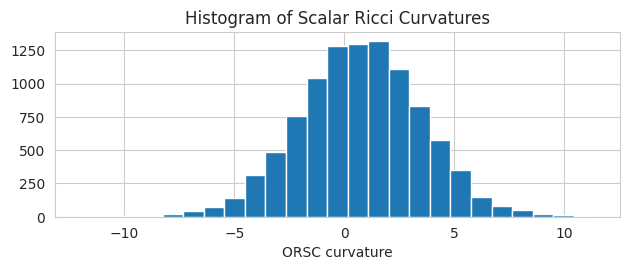

In [ ]:
S_2d_orsc = calculate_ORSC_any_manifold(S_2d_orc, d=2, epsilon=0.3)

In [ ]:
pickle.dump(S_2d_orsc, open('S_2d_orsc.pickle', 'wb')) # RGGs with Ricci curvature edge attributes on the edges and Discrete Ricci node attributes

TRACE:GraphRicciCurvature:Number of nodes: 10000
TRACE:GraphRicciCurvature:Number of edges: 1116198
TRACE:GraphRicciCurvature:Start to compute all pair shortest path.
TRACE:GraphRicciCurvature:190.928229 secs for all pair by NetworKit.
INFO:GraphRicciCurvature:10166.014314 secs for Ricci curvature computation.


G, first 100 edges: 
Ollivier-Ricci curvature of edge (0,18) is -0.017189
Ollivier-Ricci curvature of edge (0,76) is 0.001505
Ollivier-Ricci curvature of edge (0,79) is -0.007585
Ollivier-Ricci curvature of edge (0,103) is -0.012091
Ollivier-Ricci curvature of edge (0,145) is -0.046712
Ollivier-Ricci curvature of edge (0,244) is 0.015202
Ollivier-Ricci curvature of edge (0,253) is -0.014887
Ollivier-Ricci curvature of edge (0,345) is 0.002824
Ollivier-Ricci curvature of edge (0,451) is 0.020547
Ollivier-Ricci curvature of edge (0,540) is -0.015737
Ollivier-Ricci curvature of edge (0,687) is -0.005006
Ollivier-Ricci curvature of edge (0,697) is -0.023422
Ollivier-Ricci curvature of edge (0,729) is -0.003331
Ollivier-Ricci curvature of edge (0,732) is -0.002805
Ollivier-Ricci curvature of edge (0,813) is -0.018370
Ollivier-Ricci curvature of edge (0,825) is 0.010653
Ollivier-Ricci curvature of edge (0,889) is -0.013185
Ollivier-Ricci curvature of edge (0,899) is 0.024287
Ollivier-Ricci c

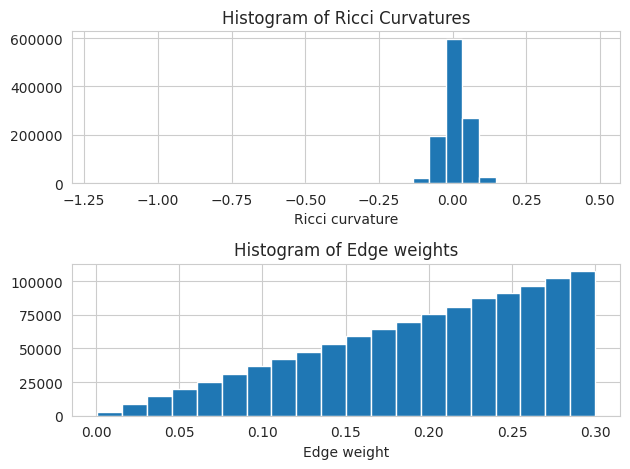

In [ ]:
S_2d_orc = calculate_ORC_any_manifold(G_S_2d)

In [ ]:
S_2d_orsc = calculate_ORSC_any_manifold(S_2d_orc, d=2, epsilon=0.3)

NameError: ignored

In [ ]:
P_orc = calculate_ORC_any_manifold(G_P)

TRACE:GraphRicciCurvature:Number of nodes: 10000
TRACE:GraphRicciCurvature:Number of edges: 3635688
TRACE:GraphRicciCurvature:Start to compute all pair shortest path.
TRACE:GraphRicciCurvature:435.817828 secs for all pair by NetworKit.


In [ ]:
P_orsc = calculate_ORSC_any_manifold(P_orc)

### POT ###

In [ ]:
pip install POT

In [ ]:
import ot

In [ ]:
Wd = ot.emd2(a, b, M) # exact linear program
Wd_reg = ot.sinkhorn2(a, b, M, reg)